In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
dropping_columns = ['RowNumber','CustomerId','Surname']
df.drop(dropping_columns, axis=1, inplace =True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.describe(include = 'object').T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


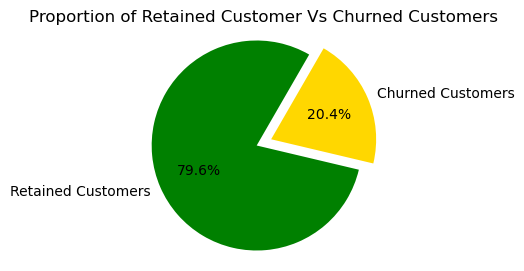

In [11]:
import matplotlib.pyplot as plt
Retained_count = df[df['Exited']==0]['Exited'].count()
churned_count = df[df['Exited']==1]['Exited'].count()

labels = ['Retained Customers', 'Churned Customers']
sizes = [Retained_count, churned_count]
colors = ['green', 'gold']
explode = (0,0.15)


plt.figure(figsize= (5,3))
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 60)
plt.axis('equal')
plt.title('Proportion of Retained Customer Vs Churned Customers')
plt.show()

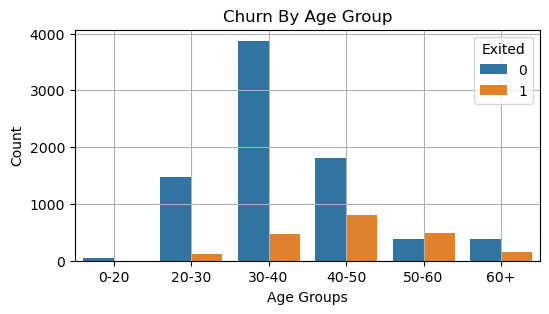

In [12]:
import seaborn as sns
age_bins = [0, 20, 30, 40, 50, 60,100]
age_labels = ['0-20', '20-30','30-40','40-50','50-60','60+']

df['AgeGroup'] = pd.cut(df['Age'], bins = age_bins, labels = age_labels,  right=False)

plt.figure(figsize = (6,3))
sns.countplot(data = df, x = 'AgeGroup', hue = 'Exited')
plt.title('Churn By Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.legend(title = 'Exited')
plt.grid()
plt.show()

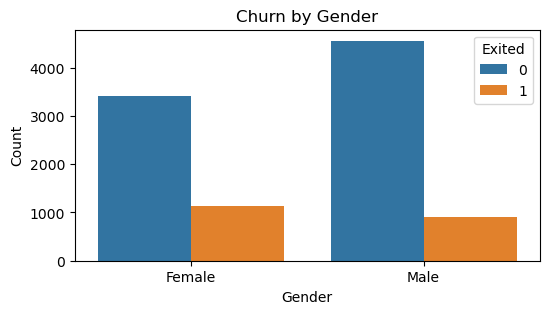

In [13]:
plt.figure(figsize = (6,3))
sns.countplot(data = df, x='Gender', hue = 'Exited')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

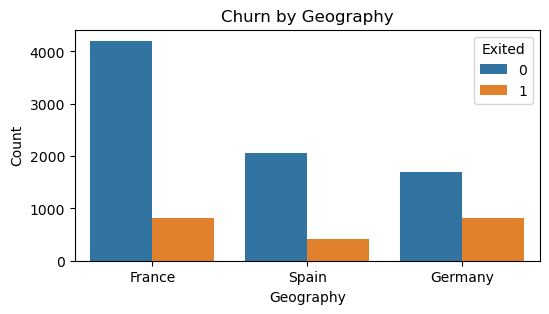

In [14]:
plt.figure(figsize = (6,3))
sns.countplot(data = df, x= 'Geography', hue = 'Exited')
plt.title('Churn by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

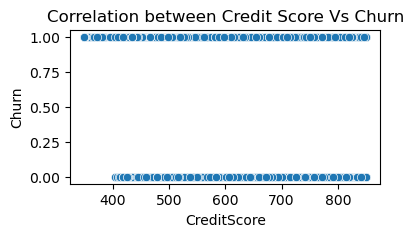

Correlation between Credit Score and Churn: -0.027093539754657683


In [15]:
plt.figure(figsize = (4,2))
sns.scatterplot(data = df, x= 'CreditScore', y= 'Exited')
plt.title('Correlation between Credit Score Vs Churn')
plt.ylabel('Churn')
plt.xlabel('CreditScore')
plt.show()

correlation_credit_churn = df['CreditScore'].corr(df['Exited'])
print(f"Correlation between Credit Score and Churn: {correlation_credit_churn}")

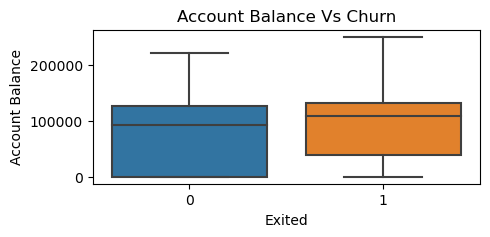

In [16]:
plt.figure(figsize = (5,2))
sns.boxplot(data = df, x= 'Exited', y= 'Balance')
plt.title('Account Balance Vs Churn')
plt.xlabel('Exited')
plt.ylabel('Account Balance')
plt.show()

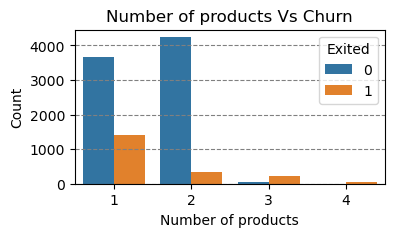

In [17]:
plt.figure(figsize = (4,2))
plt.grid(color='gray', linestyle='--')
sns.countplot(data = df, x='NumOfProducts', hue = 'Exited')
plt.title('Number of products Vs Churn')
plt.xlabel('Number of products')
plt.ylabel('Count')
plt.show()

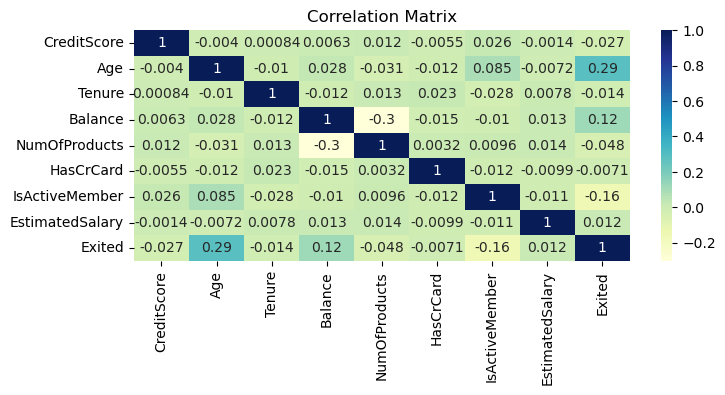

In [18]:
corr_matrix = df.corr()
plt.figure(figsize = (8,3))
sns.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu')
plt.title('Correlation Matrix')
plt.show()

In [19]:
df.drop('AgeGroup', axis =1 , inplace = True)

In [20]:
encoded_df = pd.get_dummies(df, columns = ['Geography', 'Gender'])
encoded_df 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [21]:
features = encoded_df.drop('Exited', axis =1)
target = encoded_df['Exited']
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Model Performance Accuracy:{accuracy:.3f}')


Model Performance Accuracy:0.801


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      2416
           1       0.44      0.08      0.14       584

    accuracy                           0.80      3000
   macro avg       0.63      0.53      0.51      3000
weighted avg       0.74      0.80      0.74      3000



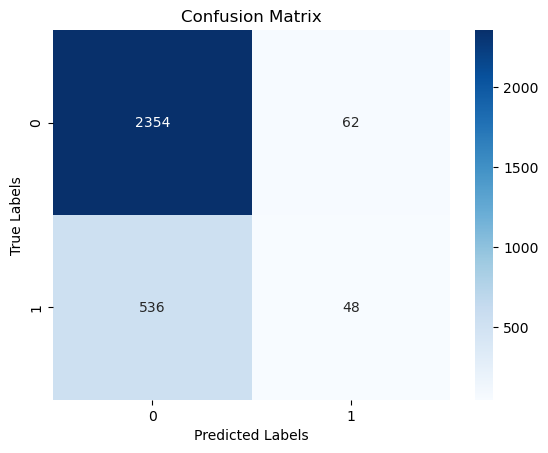

In [27]:
con_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(con_matrix, annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Inference
* True Positives (TP): We correctly predicted 48 instances of customers who churned from the bank. The model accurately identified customers who actually churned.
* True Negatives (TN): We correctly predicted 2354 instances of customers who did not churn from the bank. The model accurately identified customers who stayed with the bank.
* False Positives (FP): We incorrectly predicted 62 instances as churned, but they actually did not churn. The model flagged some customers as potential churners, but they stayed with the bank.
* False Negatives (FN): We incorrectly predicted 536 instances as not churned, but they actually churned. The model missed identifying some customers who actually left the bank.